In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Import data here
df=pd.read_csv("./dataset_expanded.csv", header=None)
df.head()

,0,1,2,3,4,5,6
0,Residual_Energy,Application_Type,Min_Security_Level,Max_RAM,Max_ROM,Min_Throughput,Algorithm
1,100.0,A,L1,2100.0,4000.0,300000.0,Piccolo
2,90.0,A,L1,2100.0,4000.0,300000.0,Piccolo
3,80.0,A,L1,2100.0,4000.0,300000.0,Piccolo
4,70.0,A,L1,2100.0,4000.0,300000.0,Piccolo


In [3]:
df.columns = df.iloc[0]
df = df[1:]
df.head()

,Residual_Energy,Application_Type,Min_Security_Level,Max_RAM,Max_ROM,Min_Throughput,Algorithm
1,100.0,A,L1,2100.0,4000.0,300000.0,Piccolo
2,90.0,A,L1,2100.0,4000.0,300000.0,Piccolo
3,80.0,A,L1,2100.0,4000.0,300000.0,Piccolo
4,70.0,A,L1,2100.0,4000.0,300000.0,Piccolo
5,60.0,A,L1,2100.0,4000.0,300000.0,Piccolo


In [4]:
df['Residual_Energy'] = pd.to_numeric(df['Residual_Energy'])
df['Max_RAM'] = pd.to_numeric(df['Max_RAM'])
df['Max_ROM'] = pd.to_numeric(df['Max_ROM'])
df['Min_Throughput'] = pd.to_numeric(df['Min_Throughput'])
df.dtypes

0
Residual_Energy       float64
Application_Type       object
Min_Security_Level     object
Max_RAM               float64
Max_ROM               float64
Min_Throughput        float64
Algorithm              object
dtype: object

In [5]:
# Feature selection
X = df.drop(['Algorithm'], axis=1)
y = df['Algorithm']

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale data?

object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))
low_cardinality_cols

['Min_Security_Level']

In [7]:
num_X_train = X_train.select_dtypes(exclude=['object'])
num_X_test = X_test.select_dtypes(exclude=['object'])

OH_cols_train = pd.get_dummies(X_train[low_cardinality_cols],drop_first=False)
OH_cols_test = pd.get_dummies(X_test[low_cardinality_cols],drop_first=False)

X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [36]:
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform') # optimize the n_neighbors value
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [37]:
y_predict = knn.predict(X_test)
y_predict

array(['SIMON', 'XTEA', 'RECTANGLE', ..., 'LBlock', 'SIMON', 'PRINCE'],
      shape=(8181,), dtype=object)

In [38]:
# Accuracy
print("Accuracy of K Nearest Neighbors model is ", metrics.accuracy_score(y_test, y_predict))
print("F1 Score is ", metrics.f1_score(y_predict, y_test, average="weighted"))

Accuracy of K Nearest Neighbors model is  0.41461923970174797
F1 Score is  0.4232624290149496


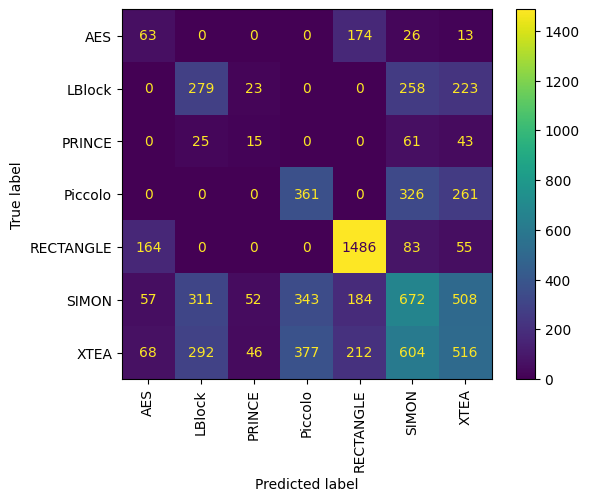

In [39]:
# Confusion matrix
# labels = ["cipher1", "cipher2", ...]
cm = metrics.confusion_matrix(y_test, y_predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
display.plot(xticks_rotation='vertical')